# PRODIGY INTERNSHIP

## TASK 02 - Data Cleaning & EDA

Perform Data Cleaning and EDA to explore relationships between variables, identify patterns and trends.

### Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Loading Dataset

In [6]:
# Load the dataset
data = pd.read_csv("Employee2.csv")
data

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


### Data Exploration

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [10]:
data.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [12]:
data.columns

Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')

In [14]:
print("Unique Value Analysis of the Dataset")
print("\t")
for column in data.columns:
    unique_values = data[column].unique() # Displays unique values in a column
    count_unique_values = len(unique_values) # Displays number of unique values in a column
    print(f"Column Name: {column}")
    print(f"Unique Values: {unique_values}")
    print(f"Number of Unique Values: {count_unique_values}")
    print("\n")

Unique Value Analysis of the Dataset
	
Column Name: Company
Unique Values: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Number of Unique Values: 7


Column Name: Age
Unique Values: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Number of Unique Values: 30


Column Name: Salary
Unique Values: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Number of Unique Values: 41


Column Name: Place
Unique Values: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Number of Unique Values: 12


Column Name: Country
Unique Values: ['India']
Number of Unique Values: 1


Column Name: Gender
Unique Values: [0 1]
Number of Uniqu

### Data Cleaning

Removing Duplicates

In [17]:
data.shape

(148, 6)

In [19]:
print("Duplicate values in the dataset:")
print('\t')
data.duplicated().sum()

Duplicate values in the dataset:
	


4

In [21]:
data.drop_duplicates(inplace=True)

In [23]:
data.shape

(144, 6)

Missing Values

In [29]:
data.head(10)

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
5,Infosys,NaN,5000.0,Calcutta,India,0
6,TCS,NaN,6000.0,Chennai,India,1
7,Infosys,23.0,7000.0,Mumbai,India,1
8,TCS,34.0,8000.0,Calcutta,India,1
9,CTS,45.0,9000.0,Delhi,India,0


In [27]:
print("Missing/Null values in each column:")
print('\t')
missing_values = data.isnull().sum()
missing_values

Missing/Null values in each column:
	


Company     8
Age        17
Salary     23
Place      14
Country     0
Gender      0
dtype: int64

In [33]:
print("Replacing 0 with NaN values in the age column")
print('\t')
data['Age'] = data['Age'].replace(0,np.nan)
data

Replacing 0 with NaN values in the age column
	


,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [35]:
print("Replacing missing values in the numerical columns with median and mode")
print('\t')
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Salary'] = data['Salary'].fillna(data['Salary'].median())
data

Replacing missing values in the numerical columns with median and mode
	


,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5000.0,Chennai,India,0
1,Infosys,30.0,5000.0,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [37]:
print("Replacing missing values in the categorical columns with mode")
print('\t')
data['Company'] = data['Company'].fillna(data['Company'].mode()[0])
data['Place'] = data['Place'].fillna(data['Place'].mode()[0])
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data

Replacing missing values in the categorical columns with mode
	


,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5000.0,Chennai,India,0
1,Infosys,30.0,5000.0,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


Outlier Removal

Since Age and Salary are the only continuous columns, we will perform outlier removal on those.

Boxplot Graph to visualize outliers in Age and Salary columns
	


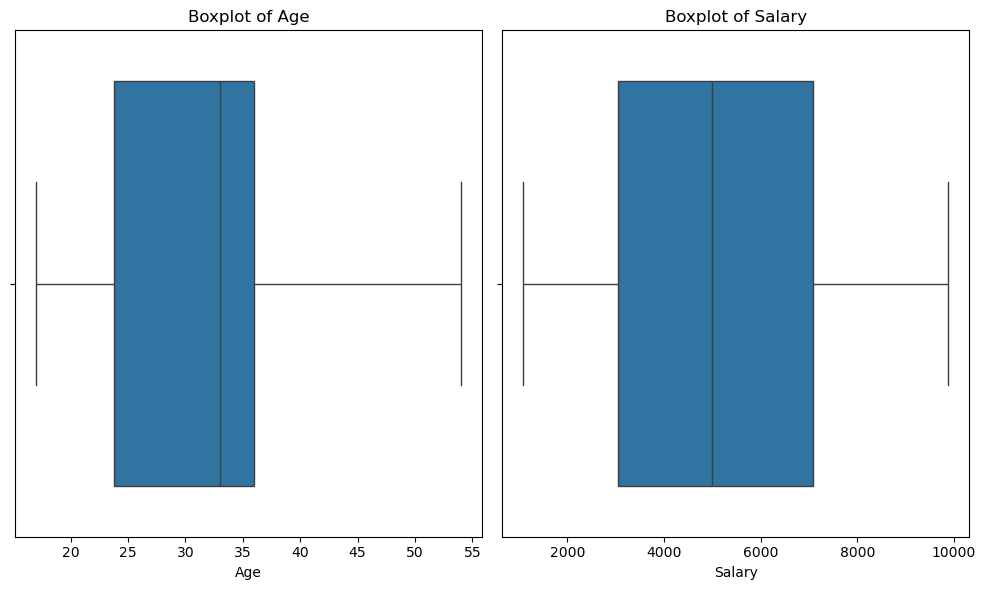

In [41]:
print("Boxplot Graph to visualize outliers in Age and Salary columns")
print('\t')
plt.figure(figsize=(10, 6))

# Plot for Age
plt.subplot(1, 2, 1)
sns.boxplot(x=data['Age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')

# Plot for Salary
plt.subplot(1, 2, 2)
sns.boxplot(x=data['Salary'])
plt.title('Boxplot of Salary')
plt.xlabel('Salary')

# Show the plots
plt.tight_layout()
plt.show()

In [43]:
print("Using IQR Method to determine outliers in the Age column")
print('\t')
Q1_age = data['Age'].quantile(0.25)
Q3_age = data['Age'].quantile(0.75)

IQR_age = Q3_age - Q1_age

# Calculate the lower and upper bounds for outliers in 'age'
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

# Identify outliers in the 'age' column
age_outliers = data[(data['Age'] < lower_bound_age) | (data['Age'] > upper_bound_age)]

print("Using IQR Method to determine outliers in the Salary column")
print('\t')
Q1_salary = data['Salary'].quantile(0.25)
Q3_salary = data['Salary'].quantile(0.75)
IQR_salary = Q3_salary - Q1_salary

# Calculate the lower and upper bounds for outliers in 'salary'
lower_bound_salary = Q1_salary - 1.5 * IQR_salary
upper_bound_salary = Q3_salary + 1.5 * IQR_salary

# Identify outliers in the 'salary' column
salary_outliers = data[(data['Salary'] < lower_bound_salary) | (data['Salary'] > upper_bound_salary)]

# 3. Display the outliers in Age and Salary columns
print("Outliers in Age:")
print(age_outliers)
print("\n")
print("Outliers in Salary:")
print(salary_outliers)

Using IQR Method to determine outliers in the Age column
	
Using IQR Method to determine outliers in the Salary column
	
Outliers in Age:
Empty DataFrame
Columns: [Company, Age, Salary, Place, Country, Gender]
Index: []


Outliers in Salary:
Empty DataFrame
Columns: [Company, Age, Salary, Place, Country, Gender]
Index: []


### EDA

**Univariate Analysis**

Categorical Columns

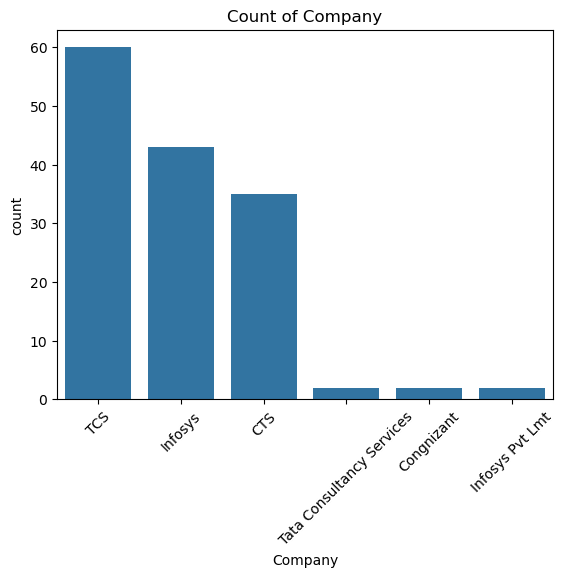

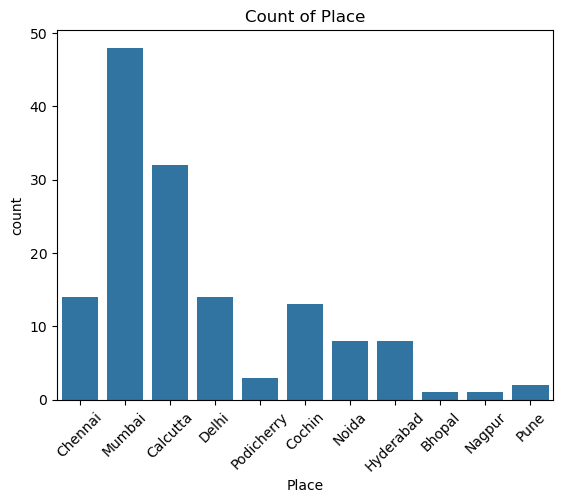

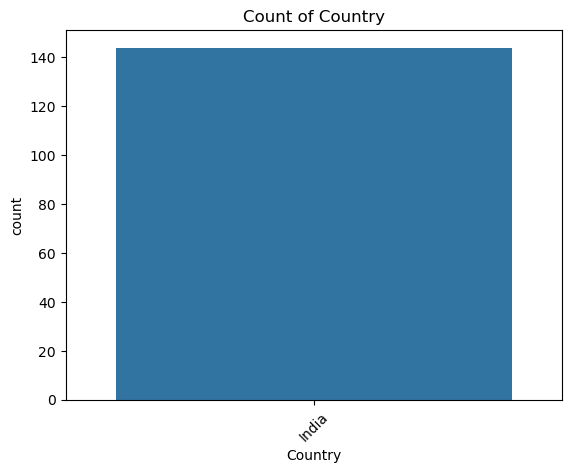

In [47]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    sns.countplot(x=col, data=data)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()

From the above visuals, we can observe that the company TCS has the most number of employees in this dataset. In terms of the city, Mumbai employees the most.

Numerical Columns

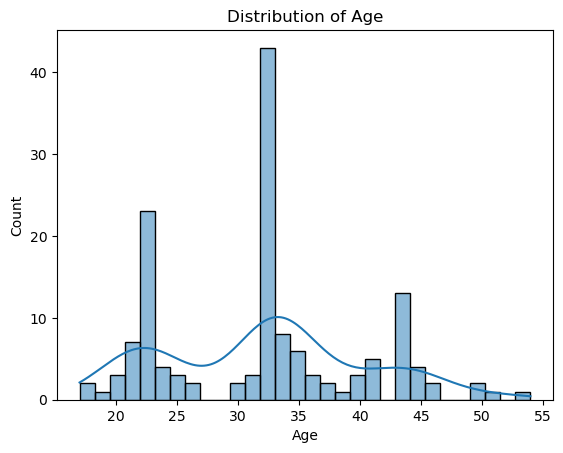

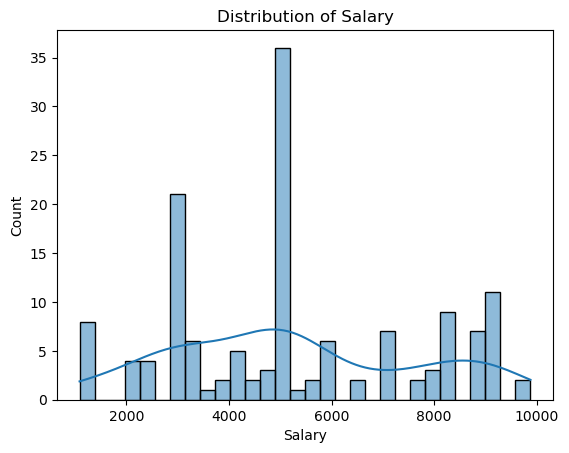

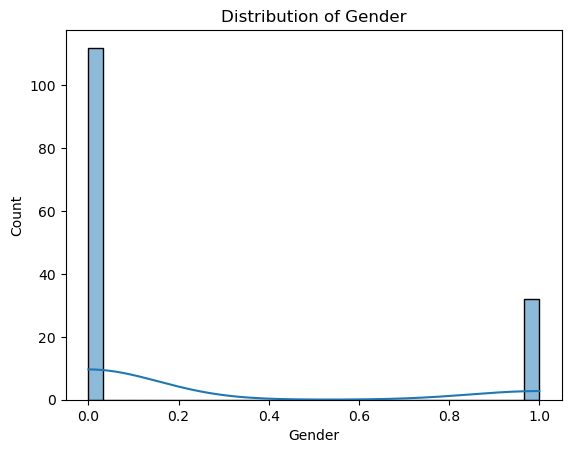

In [51]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

From the above visuals, we can see that the most occuring age is between 32-33, the most occuring salary is 5000, and female gender is the highest in this dataset.  

**Bivariate Analysis**

Numerical vs Numerical

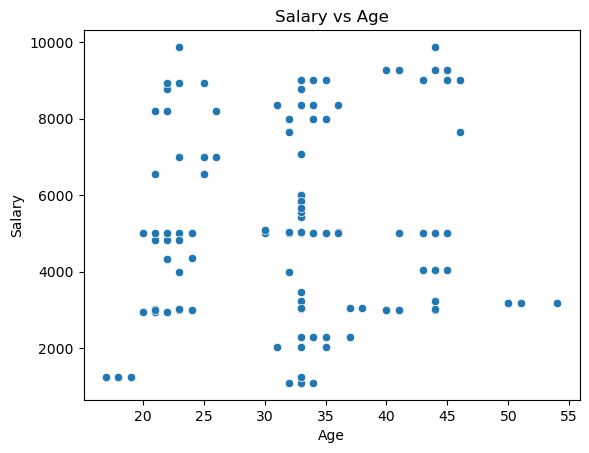

In [58]:
sns.scatterplot(x='Age', y='Salary', data=data)
plt.title('Salary vs Age')
plt.show()

In [ ]:
The above scatter plot shows an almost even distribution suggesting no discernable relationship between age and salary.

Categorical vs Numerical

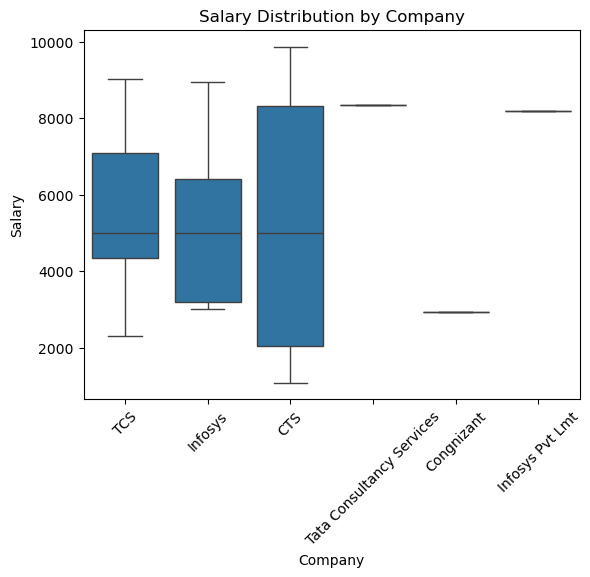

In [62]:
sns.boxplot(x='Company', y='Salary', data=data)
plt.title('Salary Distribution by Company')
plt.xticks(rotation=45)
plt.show()

CTS has the most evenly distributed salary with minimal outliers.

**Correlation Analysis**

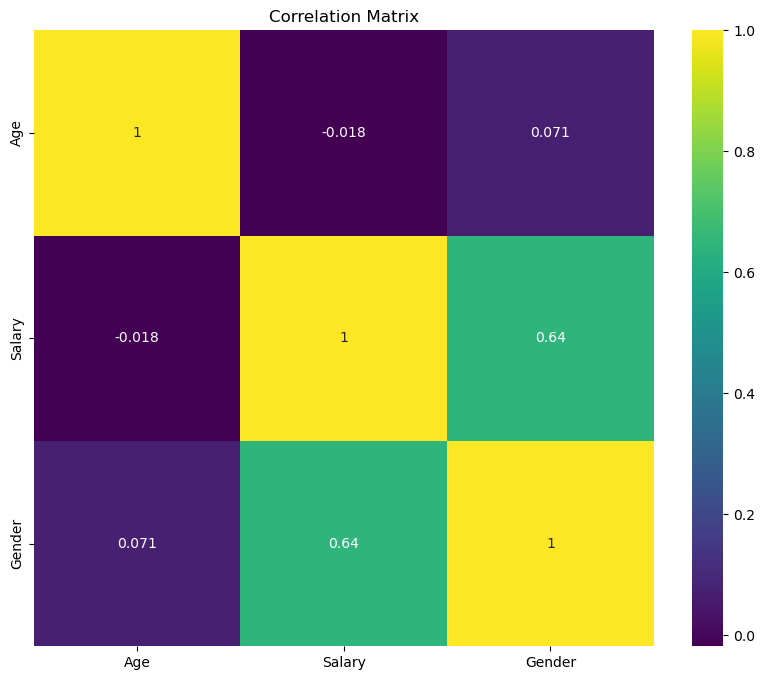

In [69]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='viridis')
plt.title("Correlation Matrix")
plt.show()

From the above visual, we can the most correlated features are Salary and Gender.